In [34]:
import random as rd
import numpy as np
import pandas as pd
import csv

#head data
iterasi = []
datadesk = [["Cust_Num", "IAt", "Arrival_Time", 
         "When Able Available", "When Baker Available", 
         "Server Chosen","service Time","Service_Begins",
         "S_ends Able","S_ends Baker",
         "Custmer waiting","Time_In_Sys"]]
Iat=[1,2,3,4]
prob_IAt=[0.25,0.40,0.20,.015]

able_st=[2,3,4,5]
prob_Able_st =[0.30,0.28,0.25,0.17]

baker_st = [3,4,5,6]
prob_baker_st = [0.35,0.25,0.20,0.20]

pd.DataFrame(data=[Iat,prob_IAt],index=['Iat','Prob_Iat'])

,0,1,2,3
Iat,1.00,2.0,3.0,4.000
Prob_Iat,0.25,0.4,0.2,0.015


In [19]:
def desk(x):
    CallNumber = 0
    intterArrival = [0]
    arivalTime = [0]
    WhenAAvailable = []
    WhenBAvailable = []
    ServerChosen = []
    TServiceBegin = [0]
    ServiceCompletionA = []
    ServiceCompletionB = []
    CallerDelay = []
    TimeInSistem = []
    serviceTime = []
    total = []
    with open(x, "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerows(datadesk)
        for cc in range(int(input('enter number of customer you want to simulate: '))):
            total.append([])
            for i in range(1):
                data=[]
                CallNumber +=1 
            #   
                data.append(CallNumber)
            #   
                data.append(intterArrival[-1])

            #  here define b and give it the summation of arrivaltime and interarrivaltime 
                b=arivalTime[-1]+intterArrival[-1]
            #   here we generate random interarrivaltime in range 1->4
                x=rd.choices(Iat,weights=prob_IAt,k=1)
                intterArrival.append(x[0])
            #   
                arivalTime.append(b)
            #   
                data.append(arivalTime[-1])

            #   
                if(len(WhenAAvailable) > 1):
                    if(ServiceCompletionA[-1]-ServiceCompletionA[-2]!=0):
                            WhenAAvailable.append(ServiceCompletionA[-1])
                            data.append(WhenAAvailable[-1])
                    else:
                        WhenAAvailable.append(WhenAAvailable[-1])
                        data.append(WhenAAvailable[-1])
                        
                elif(len(WhenAAvailable) == 1):
                    WhenAAvailable.append(ServiceCompletionA[-1]-WhenAAvailable[-1])
                    data.append(WhenAAvailable[-1])
                else:
                    WhenAAvailable.append(0)
                    data.append(WhenAAvailable[-1])

             #   WhenAbleAvailable -> data   
                if(len(WhenBAvailable) > 1):
                    if(ServiceCompletionB[-1]-ServiceCompletionB[-2]!=0):
                        WhenBAvailable.append(ServiceCompletionB[-1])
                        data.append(WhenBAvailable[-1])
                    else:
                        WhenBAvailable.append(WhenBAvailable[-1])
                        data.append(WhenBAvailable[-1])
                elif(len(WhenBAvailable) == 1):
                    WhenBAvailable.append(ServiceCompletionB[-1]-WhenBAvailable[-1])
                    data.append(WhenBAvailable[-1])
                else:
                    WhenBAvailable.append(0)
                    data.append(WhenBAvailable[-1])

                if(WhenAAvailable[-1]-WhenBAvailable[-1]<=0):
                    #  get value Service Time
                    y=rd.choices(able_st,weights=prob_Able_st,k=1)
                    serviceTime.append(y[0])
                    #  get value ServerChosen
                    ServerChosen.append('S_Able')
                    #   ServerChosen -> data
                    data.append(ServerChosen[-1])
                    #   Service Time -> data
                    data.append(serviceTime[-1])
                else:
                    #  get value Service Time
                    z=np.random.choice(baker_st, 1, p=prob_baker_st)
                    serviceTime.append(z[0])
                    #  get value ServerChosen
                    ServerChosen.append('S_Baker')
                    #   ServerChosen -> data
                    data.append(ServerChosen[-1])
                    #   Service Time -> data
                    data.append(serviceTime[-1])


                #  get value CallerDelay && TServiceBegin
                if(ServerChosen[-1]=='S_Able'):
                    if(len(ServiceCompletionA) != 0):
                        if(ServiceCompletionA[-1] - arivalTime[-1] <0):
                            TServiceBegin.append(arivalTime[-1])
                            CallerDelay.append(0)
                        else:
                            TServiceBegin.append(ServiceCompletionA[-1])
                            CallerDelay.append(ServiceCompletionA[-1] - arivalTime[-1])
                    else:
                        if( 0 - arivalTime[-1] <0):
                            TServiceBegin.append(arivalTime[-1])
                            CallerDelay.append(0)
                        else:
                            TServiceBegin.append(0)
                            CallerDelay.append(0)      
                else:
                    if(len(ServiceCompletionB) != 0):
                        if(ServiceCompletionB[-1] - arivalTime[-1] <0):
                            TServiceBegin.append(arivalTime[-1])
                            CallerDelay.append(0)
                        else:
                            TServiceBegin.append(ServiceCompletionB[-1])
                            CallerDelay.append(ServiceCompletionB[-1] - arivalTime[-1])
                    else:
                        if( 0 - arivalTime[-1] <0):
                            TServiceBegin.append(arivalTime[-1])
                            CallerDelay.append(0)
                        else:
                            TServiceBegin.append(0)
                            CallerDelay.append(ServiceCompletionB[-1] - arivalTime[-1])

            #   Time Sevice Begins -> data
                data.append(TServiceBegin[-1])

                if(len(TServiceBegin) != 0):
                    c = serviceTime[-1]+TServiceBegin[-1]
                else:
                    c = serviceTime[-1]+0

                #  get value ServiceCompletionBaker
                if(ServerChosen[-1]=='S_Able'):    
                    ServiceCompletionA.append(c)
                    if(len(ServiceCompletionB) != 0):
                        ServiceCompletionB.append(ServiceCompletionB[-1])
                    else:
                        ServiceCompletionB.append(0)
                    #   Service Completions -> data
                    data.append(ServiceCompletionA[-1])
                    data.append(ServiceCompletionB[-1])
                else:
                    ServiceCompletionB.append(c)
                    if(len(ServiceCompletionA) != 0):
                        ServiceCompletionA.append(ServiceCompletionA[-1])
                    else:
                        ServiceCompletionA.append(0)
                    #   Service Completions -> data
                    data.append(ServiceCompletionA[-1])
                    data.append(ServiceCompletionB[-1])

                #   Caller Delay -> data
                data.append(CallerDelay[-1])

            #   get value Time in System 
                TimeInSistem.append(CallerDelay[-1]+serviceTime[-1])
            #   Time in System -> data
                data.append(TimeInSistem[-1])

                print(data)
                total[cc].append(data)

                
                writer.writerows(total[cc])
            
    iterasi.append(total)

In [20]:
im = ['dataiterasi1.csv']
for b in range(1):
    a = im[b]
    desk(a)

enter number of customer you want to simulate: 10
[1, 0, 0, 0, 0, 'S_Able', 4, 0, 4, 0, 0, 4]
[2, 3, 3, 4, 0, 'S_Baker', 3, 3, 4, 6, 0, 3]
[3, 1, 4, 4, 6, 'S_Able', 3, 4, 7, 6, 0, 3]
[4, 2, 6, 7, 6, 'S_Baker', 4, 6, 7, 10, 0, 4]
[5, 2, 8, 7, 10, 'S_Able', 3, 8, 11, 10, 0, 3]
[6, 1, 9, 11, 10, 'S_Baker', 3, 10, 11, 13, 1, 4]
[7, 1, 10, 11, 13, 'S_Able', 5, 11, 16, 13, 1, 6]
[8, 1, 11, 16, 13, 'S_Baker', 3, 13, 16, 16, 2, 5]
[9, 2, 13, 16, 16, 'S_Able', 4, 16, 20, 16, 3, 7]
[10, 3, 16, 20, 16, 'S_Baker', 6, 16, 20, 22, 0, 6]


In [22]:
import pandas as pd
df = pd.read_csv('dataiterasi1.csv')

In [23]:
df

,Cust_Num,IAt,Arrival_Time,When Able Available,When Baker Available,Server Chosen,service Time,Service_Begins,S_ends Able,S_ends Baker,Custmer waiting,Time_In_Sys
0,1,0,0,0,0,S_Able,4,0,4,0,0,4
1,2,3,3,4,0,S_Baker,3,3,4,6,0,3
2,3,1,4,4,6,S_Able,3,4,7,6,0,3
3,4,2,6,7,6,S_Baker,4,6,7,10,0,4
4,5,2,8,7,10,S_Able,3,8,11,10,0,3
5,6,1,9,11,10,S_Baker,3,10,11,13,1,4
6,7,1,10,11,13,S_Able,5,11,16,13,1,6
7,8,1,11,16,13,S_Baker,3,13,16,16,2,5
8,9,2,13,16,16,S_Able,4,16,20,16,3,7
9,10,3,16,20,16,S_Baker,6,16,20,22,0,6


In [15]:
df.columns

Index(['Cust_Num', 'IAt', 'Arrival_Time', 'When Able Available',
       'When Baker Available', 'Server Chosen', 'service Time',
       'Service_Begins', 'S_ends Able', 'S_ends Baker', 'Custmer waiting',
       'Time_In_Sys'],
      dtype='object')

In [24]:
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

<AxesSubplot:xlabel='Custmer waiting', ylabel='count'>

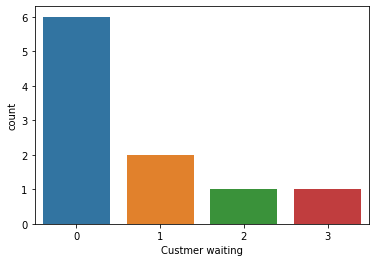

In [27]:
sns.countplot(data=df,x=df['Custmer waiting'])

<AxesSubplot:xlabel='Time_In_Sys', ylabel='Count'>

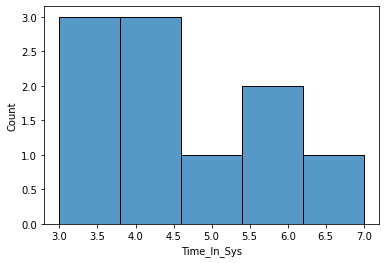

In [28]:
sns.histplot(df.Time_In_Sys)